## Problem Statement:

## “To search for and recommend best restaurants in a city  for different kinds of cuisines based on reviews given by customers .”   


In [12]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline



In [15]:
bu_df = pd.read_json('./yelp/yelp_academic_dataset_business.json',lines= True)
bu_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",MontrÃ©al,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [16]:
print("In total we have", bu_df.shape[0], "0users.")

In total we have 188593 0users.


In [17]:
# To show number of open and closed businesses

op = bu_df.groupby('is_open').business_id.count()
op

is_open
0     31987
1    156606
Name: business_id, dtype: int64

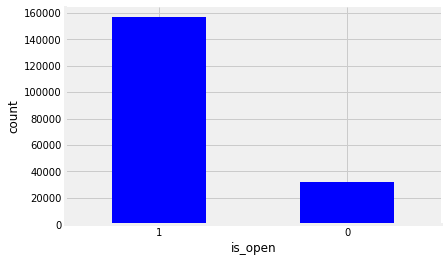

In [18]:
# To plot a bar graph to show the total number of open and closed businesses

bu_df.is_open.value_counts(dropna=False).plot(kind='bar',color='blue', rot=0)
plt.xlabel('is_open')
plt.ylabel('count')
sns.despine()

In [19]:
#Drop the rows where is_open=0 (those have been closed)

bu_df.drop(bu_df[bu_df.is_open == 0].index, inplace=True)
bu_df.head(200)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA
12,2801 N 15th Ave,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.479807,-112.091188,Original Hamburger Works,,85007,277,4.0,AZ
13,4216 Saint-Laurent Boul,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",bBUMib8l6Me1ZB1_Qkezkg,"Restaurants, Pakistani, Indian, Middle Eastern",MontrÃ©al,None,1,45.518036,-73.582174,Mysore Indian Cuisine,Plateau-Mont-Royal,H2W 1Z3,19,3.5,QC
14,4404 14 Street NW,"{'BusinessParking': '{'garage': False, 'street...",o_zDURWzgt5yM5HW_xGJsg,"Beauty & Spas, Barbers",Calgary,"{'Monday': '9:30-18:0', 'Tuesday': '9:30-18:0'...",1,51.091857,-114.094625,North Haven Barber Shop,,T2K,3,4.5,AB


In [20]:
#hours is in nested form. so we change it into series
hours = bu_df['hours'].apply(pd.Series)
hours.to_json('hours1.json')
hours

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,8:30-17:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN
5,5:30-20:0,5:30-20:0,5:30-20:0,5:30-20:0,5:30-21:0,5:30-21:0,6:30-19:0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
9,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-17:0,10:0-17:0,NaN
12,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,11:0-22:0,11:0-21:0
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,NaN


In [21]:
attrib = bu_df['attributes'].apply(pd.Series)
attrib.drop('BikeParking', axis = 1, inplace = True)
attrib.drop('BusinessParking', axis = 1, inplace = True)
attrib

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,Smoking,ByAppointmentOnly,DogsAllowed,AcceptsInsurance,BusinessAcceptsBitcoin,HairSpecializesIn,AgesAllowed,Open24Hours,RestaurantsCounterService,DietaryRestrictions
0,True,True,True,average,False,casual,False,True,2,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,True,NaN,NaN,NaN,True,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,True,True,NaN,NaN,False,casual,NaN,True,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,True,True,False,average,False,casual,False,True,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,True,True,True,average,True,casual,False,True,1,False,...,outdoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,True,True,False,quiet,False,casual,True,True,2,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
attrib_hours = pd.concat([attrib, hours], axis = 1)
attrib_hours

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,Open24Hours,RestaurantsCounterService,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,True,True,True,average,False,casual,False,True,2,True,...,NaN,NaN,NaN,8:30-17:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN
5,True,NaN,NaN,NaN,True,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,5:30-20:0,5:30-20:0,5:30-20:0,5:30-20:0,5:30-21:0,5:30-21:0,6:30-19:0
7,True,True,NaN,NaN,False,casual,NaN,True,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,True,True,False,average,False,casual,False,True,1,False,...,NaN,NaN,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
9,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-17:0,10:0-17:0,NaN
12,True,True,True,average,True,casual,False,True,1,False,...,NaN,NaN,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,11:0-22:0,11:0-21:0
13,True,True,False,quiet,False,casual,True,True,2,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,NaN


In [23]:
bu1 = pd.concat([attrib_hours, bu_df], axis = 1)
bu1

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,True,True,True,average,False,casual,False,True,2,True,...,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,True,NaN,NaN,NaN,True,NaN,NaN,NaN,1,NaN,...,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
7,True,True,NaN,NaN,False,casual,NaN,True,2,NaN,...,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,True,True,False,average,False,casual,False,True,1,False,...,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA
12,True,True,True,average,True,casual,False,True,1,False,...,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.479807,-112.091188,Original Hamburger Works,,85007,277,4.0,AZ
13,True,True,False,quiet,False,casual,True,True,2,True,...,None,1,45.518036,-73.582174,Mysore Indian Cuisine,Plateau-Mont-Royal,H2W 1Z3,19,3.5,QC
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'Monday': '9:30-18:0', 'Tuesday': '9:30-18:0'...",1,51.091857,-114.094625,North Haven Barber Shop,,T2K,3,4.5,AB


In [24]:
bu1.drop('attributes', axis = 1, inplace = True)
bu1.drop('hours', axis = 1, inplace = True)
bu1

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,True,True,True,average,False,casual,False,True,2,True,...,Calgary,1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Phoenix,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Calgary,1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,True,NaN,NaN,NaN,True,NaN,NaN,NaN,1,NaN,...,Phoenix,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
7,True,True,NaN,NaN,False,casual,NaN,True,2,NaN,...,Mississauga,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,True,True,False,average,False,casual,False,True,1,False,...,Avondale,1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,Pittsburgh,1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA
12,True,True,True,average,True,casual,False,True,1,False,...,Phoenix,1,33.479807,-112.091188,Original Hamburger Works,,85007,277,4.0,AZ
13,True,True,False,quiet,False,casual,True,True,2,True,...,MontrÃ©al,1,45.518036,-73.582174,Mysore Indian Cuisine,Plateau-Mont-Royal,H2W 1Z3,19,3.5,QC
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Calgary,1,51.091857,-114.094625,North Haven Barber Shop,,T2K,3,4.5,AB


In [25]:
bu1.to_csv('bu_new.csv')
bu1.to_json('bu_new.json')

In [26]:
bu1=pd.read_csv('bu_new.csv')
bu1.drop('Unnamed: 0',axis=1,inplace= True)
bu1

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,True,True,True,average,False,casual,False,True,2.0,True,...,Calgary,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Phoenix,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Calgary,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB
3,True,NaN,NaN,NaN,True,NaN,NaN,NaN,1.0,NaN,...,Phoenix,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,NaN,85024,63,4.0,AZ
4,True,True,NaN,NaN,False,casual,NaN,True,2.0,NaN,...,Mississauga,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
5,True,True,False,average,False,casual,False,True,1.0,False,...,Avondale,1,33.448106,-112.341302,Filiberto's Mexican Food,NaN,85323,40,2.5,AZ
6,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,Pittsburgh,1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA
7,True,True,True,average,True,casual,False,True,1.0,False,...,Phoenix,1,33.479807,-112.091188,Original Hamburger Works,NaN,85007,277,4.0,AZ
8,True,True,False,quiet,False,casual,True,True,2.0,True,...,MontrÃ©al,1,45.518036,-73.582174,Mysore Indian Cuisine,Plateau-Mont-Royal,H2W 1Z3,19,3.5,QC
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Calgary,1,51.091857,-114.094625,North Haven Barber Shop,NaN,T2K,3,4.5,AB


In [27]:
bu1.categories

0         Tours, Breweries, Pizza, Restaurants, Food, Ho...
1                             Insurance, Financial Services
2         Home & Garden, Nurseries & Gardening, Shopping...
3                                        Coffee & Tea, Food
4                                         Restaurants, Thai
5                                      Mexican, Restaurants
6                     Flowers & Gifts, Gift Shops, Shopping
7         Bars, Sports Bars, Dive Bars, Burgers, Nightli...
8            Restaurants, Pakistani, Indian, Middle Eastern
9                                    Beauty & Spas, Barbers
10                           Delis, Restaurants, Sandwiches
11                     Shopping, Fashion, Department Stores
12        Financial Services, Check Cashing/Pay-day Loan...
13        Home Services, Masonry/Concrete, Professional ...
14                          Fast Food, Burgers, Restaurants
15        Nightlife, Bars, American (Traditional), Sport...
16                             Food, Bak

In [28]:
# categories column has many categories at once. Let's split the categories column and store each category in it's own column
df_category_split = bu1['categories'].str.split(',', expand=True)[[0,1,2,3,4,5,6,7,8,9]]
# rename the new columns
df_category_split.columns = ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10']
business = pd.concat([bu1, df_category_split], axis=1)
# now drop the actual categories column
business = business.drop(['categories'], axis=1)
# print the head of the dataset
business.head()

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,True,True,True,average,False,casual,False,True,2.0,True,...,Tours,Breweries,Pizza,Restaurants,Food,Hotels & Travel,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Insurance,Financial Services,None,None,None,None,None,None,None,None
2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Home & Garden,Nurseries & Gardening,Shopping,Local Services,Automotive,Electronics Repair,None,None,None,None
3,True,NaN,NaN,NaN,True,NaN,NaN,NaN,1.0,NaN,...,Coffee & Tea,Food,None,None,None,None,None,None,None,None
4,True,True,NaN,NaN,False,casual,NaN,True,2.0,NaN,...,Restaurants,Thai,None,None,None,None,None,None,None,None


In [29]:
business_cat=business[['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10']]

business_cat

,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,Tours,Breweries,Pizza,Restaurants,Food,Hotels & Travel,None,None,None,None
1,Insurance,Financial Services,None,None,None,None,None,None,None,None
2,Home & Garden,Nurseries & Gardening,Shopping,Local Services,Automotive,Electronics Repair,None,None,None,None
3,Coffee & Tea,Food,None,None,None,None,None,None,None,None
4,Restaurants,Thai,None,None,None,None,None,None,None,None
5,Mexican,Restaurants,None,None,None,None,None,None,None,None
6,Flowers & Gifts,Gift Shops,Shopping,None,None,None,None,None,None,None
7,Bars,Sports Bars,Dive Bars,Burgers,Nightlife,Sandwiches,Restaurants,None,None,None
8,Restaurants,Pakistani,Indian,Middle Eastern,None,None,None,None,None,None
9,Beauty & Spas,Barbers,None,None,None,None,None,None,None,None


In [31]:
indian = 'Indian', ' Indian'
mexican = 'Mexican', ' Mexican'
thai = 'Thai', ' Thai'
japanese = 'Japanese', ' Japanese'
italian = 'Italian', ' Italian'
american_t = 'American (Traditional)', ' American (Traditional)'
american_new = 'American (New)', ' American (New)'
pakistani = 'Pakistani', ' Pakistani'
french = 'French', ' French'
mid_east = 'Middle Eastern', ' Middle Eastern'
chinese = 'Chinese', ' Chinese'
canadian_new = 'Canadian (New)', ' Canadian (New)'
hungarian = 'Hungarian', ' Hungarian'
german = 'German', ' German'
vietnamese = 'Vietnamese', ' Vietnamese'

business_type = ' Restaurants','Restaurants',' Food','Food' ,' Pizza', 'Pizza', 'Mexican',' Mexican','American (Traditional)', ' American (Traditional)', 'American (New)', ' American (New)', 'Italian', ' Italian', 'Indian', ' Indian', 'Pakistani', ' Pakistani', 'Thai', ' Thai', 'Japanese', ' Japanese', 'French', ' French', 'Canadian (New)', ' Canadian (New)', 'Middle Eastern', ' Middle Eastern', 'German', ' German', 'Vietnamese', ' Vietnamese', 'Chinese', ' Chinese','Hungarian', ' Hungarian'                                                  

business_type

(' Restaurants',
 'Restaurants',
 ' Food',
 'Food',
 ' Pizza',
 'Pizza',
 'Mexican',
 ' Mexican',
 'American (Traditional)',
 ' American (Traditional)',
 'American (New)',
 ' American (New)',
 'Italian',
 ' Italian',
 'Indian',
 ' Indian',
 'Pakistani',
 ' Pakistani',
 'Thai',
 ' Thai',
 'Japanese',
 ' Japanese',
 'French',
 ' French',
 'Canadian (New)',
 ' Canadian (New)',
 'Middle Eastern',
 ' Middle Eastern',
 'German',
 ' German',
 'Vietnamese',
 ' Vietnamese',
 'Chinese',
 ' Chinese',
 'Hungarian',
 ' Hungarian')

In [32]:
food = business.loc[(business['category1'].isin(business_type)) | (business['category2'].isin(business_type)) | (business['category3'].isin(business_type)) | (business['category4'].isin(business_type)) | (business['category5'].isin(business_type)) | (business['category6'].isin(business_type)) | (business['category7'].isin(business_type)) | (business['category8'].isin(business_type)) | (business['category9'].isin(business_type)) | (business['category10'].isin(business_type))]
food

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,True,True,True,average,False,casual,False,True,2.0,True,...,Tours,Breweries,Pizza,Restaurants,Food,Hotels & Travel,None,None,None,None
3,True,NaN,NaN,NaN,True,NaN,NaN,NaN,1.0,NaN,...,Coffee & Tea,Food,None,None,None,None,None,None,None,None
4,True,True,NaN,NaN,False,casual,NaN,True,2.0,NaN,...,Restaurants,Thai,None,None,None,None,None,None,None,None
5,True,True,False,average,False,casual,False,True,1.0,False,...,Mexican,Restaurants,None,None,None,None,None,None,None,None
7,True,True,True,average,True,casual,False,True,1.0,False,...,Bars,Sports Bars,Dive Bars,Burgers,Nightlife,Sandwiches,Restaurants,None,None,None
8,True,True,False,quiet,False,casual,True,True,2.0,True,...,Restaurants,Pakistani,Indian,Middle Eastern,None,None,None,None,None,None
10,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,Delis,Restaurants,Sandwiches,None,None,None,None,None,None,None
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fast Food,Burgers,Restaurants,None,None,None,None,None,None,None
15,True,False,True,average,False,casual,NaN,NaN,1.0,NaN,...,Nightlife,Bars,American (Traditional),Sports Bars,Restaurants,None,None,None,None,None
16,True,NaN,NaN,NaN,False,NaN,False,NaN,2.0,NaN,...,Food,Bakeries,Coffee & Tea,None,None,None,None,None,None,None


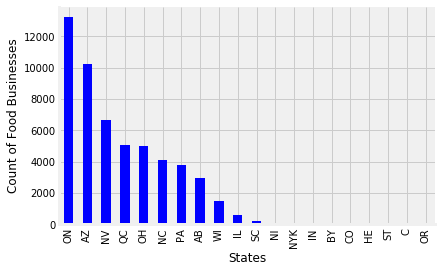

In [33]:
food.state.value_counts(dropna=False)[0:20].plot(kind='bar',color='blue')
plt.ylabel('Count of Food Businesses')
plt.xlabel('States')
sns.despine()

In [34]:
food.state.value_counts()

ON     13225
AZ     10224
NV      6651
QC      5091
OH      4976
NC      4082
PA      3772
AB      2951
WI      1489
IL       579
SC       234
NI        78
NYK       72
IN        55
BY        36
CO        28
HE        27
ST        25
C         24
OR        24
RP        17
XGM       16
NY        13
NLK       13
01        11
VS         6
NW         3
O          3
B          2
G          2
MO         2
BC         1
VA         1
RCC        1
AL         1
WAR        1
4          1
FL         1
WHT        1
SG         1
11         1
10         1
XMS        1
45         1
M          1
CA         1
SP         1
AG         1
6          1
PO         1
HU         1
Name: state, dtype: int64

In [35]:
foodon = food.loc[food['state'].isin(['ON'])]
foodon

,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
4,True,True,NaN,NaN,False,casual,NaN,True,2.0,NaN,...,Restaurants,Thai,None,None,None,None,None,None,None,None
16,True,NaN,NaN,NaN,False,NaN,False,NaN,2.0,NaN,...,Food,Bakeries,Coffee & Tea,None,None,None,None,None,None,None
43,False,NaN,NaN,NaN,NaN,NaN,False,NaN,1.0,NaN,...,Bakeries,Food,Latin American,Restaurants,Sandwiches,None,None,None,None,None
69,False,True,False,average,False,casual,False,False,1.0,False,...,Caribbean,Food,Bakeries,Restaurants,None,None,None,None,None,None
73,True,True,True,loud,True,casual,False,True,2.0,True,...,Restaurants,Food,Italian,Ice Cream & Frozen Yogurt,None,None,None,None,None,None
77,True,True,False,quiet,False,casual,True,False,1.0,False,...,Restaurants,Pizza,None,None,None,None,None,None,None,None
80,True,NaN,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,...,Food,Bakeries,None,None,None,None,None,None,None,None
82,NaN,True,False,average,False,casual,True,True,2.0,True,...,Nightlife,Wine Bars,Indian,Restaurants,Bars,None,None,None,None,None
94,True,True,NaN,NaN,False,casual,False,True,2.0,False,...,American (Traditional),Burgers,Fast Food,Restaurants,None,None,None,None,None,None
108,NaN,True,True,average,True,casual,False,True,2.0,True,...,Salad,Chicken Wings,Sandwiches,Pizza,Restaurants,None,None,None,None,None


In [36]:
foodon.columns[0:66]

Index(['BusinessAcceptsCreditCards', 'GoodForKids', 'HasTV', 'NoiseLevel',
       'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsDelivery',
       'RestaurantsGoodForGroups', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsTakeOut', 'Caters',
       'WheelchairAccessible', 'WiFi', 'Alcohol', 'RestaurantsTableService',
       'Ambience', 'GoodForMeal', 'BYOB', 'BYOBCorkage', 'BestNights',
       'CoatCheck', 'Corkage', 'DriveThru', 'GoodForDancing', 'HappyHour',
       'Music', 'Smoking', 'ByAppointmentOnly', 'DogsAllowed',
       'AcceptsInsurance', 'BusinessAcceptsBitcoin', 'HairSpecializesIn',
       'AgesAllowed', 'Open24Hours', 'RestaurantsCounterService',
       'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'address', 'business_id', 'city',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state', 'category1',
       'category2'

In [37]:
foodon.drop(foodon.columns[[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,47,52]], axis=1, inplace=True)
foodon.to_csv('foodon.csv')
foodon.to_json('foodon.json')
foodon

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
4,True,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 Derry Road E, Unit 103",...,Restaurants,Thai,None,None,None,None,None,None,None,None
16,True,2.0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 Street Clair Avenue W,...,Food,Bakeries,Coffee & Tea,None,None,None,None,None,None,None
43,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788 Wilson Avenue,...,Bakeries,Food,Latin American,Restaurants,Sandwiches,None,None,None,None,None
69,False,1.0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,12:0-21:30,81 Underhill Drive,...,Caribbean,Food,Bakeries,Restaurants,None,None,None,None,None,None
73,True,2.0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-22:0,"5451 Highway, Unit 7",...,Restaurants,Food,Italian,Ice Cream & Frozen Yogurt,None,None,None,None,None,None
77,True,1.0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-0:0,11:0-0:0,11:0-23:0,126 Clark Avenue E,...,Restaurants,Pizza,None,None,None,None,None,None,None,None
80,True,2.0,7:30-18:0,7:30-18:0,7:30-18:0,7:30-18:0,7:30-18:0,9:0-16:0,9:0-16:0,3469 Lake Shore Boulevard W,...,Food,Bakeries,None,None,None,None,None,None,None,None
82,NaN,2.0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:30-22:30,17:30-22:30,17:30-22:30,1701 Bayview Avenue,...,Nightlife,Wine Bars,Indian,Restaurants,Bars,None,None,None,None,None
94,True,2.0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-22:0,49 Eglinton Ave East,...,American (Traditional),Burgers,Fast Food,Restaurants,None,None,None,None,None,None
108,NaN,2.0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-0:0,636 Dixon Road,...,Salad,Chicken Wings,Sandwiches,Pizza,Restaurants,None,None,None,None,None


In [2]:
import pandas as pd

In [3]:
foodon = pd.read_csv('foodon.csv')
foodon.drop('Unnamed: 0',axis=1,inplace= True)
foodon

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,True,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,restaurants,thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,2.0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,food,bakeries,coffee & tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788 wilson avenue,...,bakeries,food,latin american,restaurants,sandwiches,NaN,NaN,NaN,NaN,NaN
3,False,1.0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,12:0-21:30,81 underhill drive,...,caribbean,food,bakeries,restaurants,NaN,NaN,NaN,NaN,NaN,NaN
4,True,2.0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-22:0,"5451 highway, unit 7",...,restaurants,food,italian,ice cream & frozen yogurt,NaN,NaN,NaN,NaN,NaN,NaN
5,True,1.0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-0:0,11:0-0:0,11:0-23:0,126 clark avenue e,...,restaurants,pizza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,True,2.0,7:30-18:0,7:30-18:0,7:30-18:0,7:30-18:0,7:30-18:0,9:0-16:0,9:0-16:0,3469 lake shore boulevard w,...,food,bakeries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2.0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:30-22:30,17:30-22:30,17:30-22:30,1701 bayview avenue,...,nightlife,wine bars,indian,restaurants,bars,NaN,NaN,NaN,NaN,NaN
8,True,2.0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-22:0,49 eglinton ave east,...,american (traditional),burgers,fast food,restaurants,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2.0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-0:0,636 dixon road,...,salad,chicken wings,sandwiches,pizza,restaurants,NaN,NaN,NaN,NaN,NaN


4003

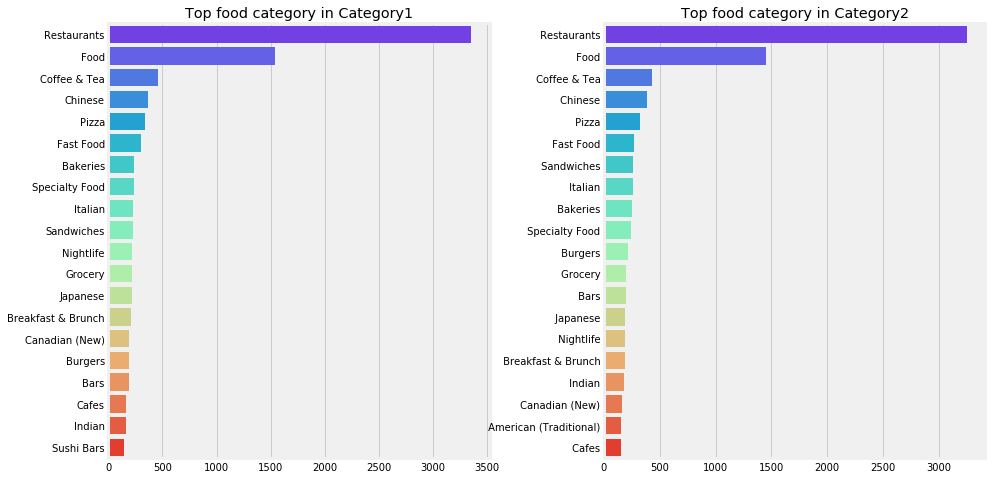

In [39]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category1'].value_counts()[:20].to_frame()

sns.barplot(cnt['category1'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category1')

cnt = foodon['category2'].value_counts()[:20].to_frame()

sns.barplot(cnt['category2'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category2')
plt.subplots_adjust(wspace=0.3)
gc.collect()

10338

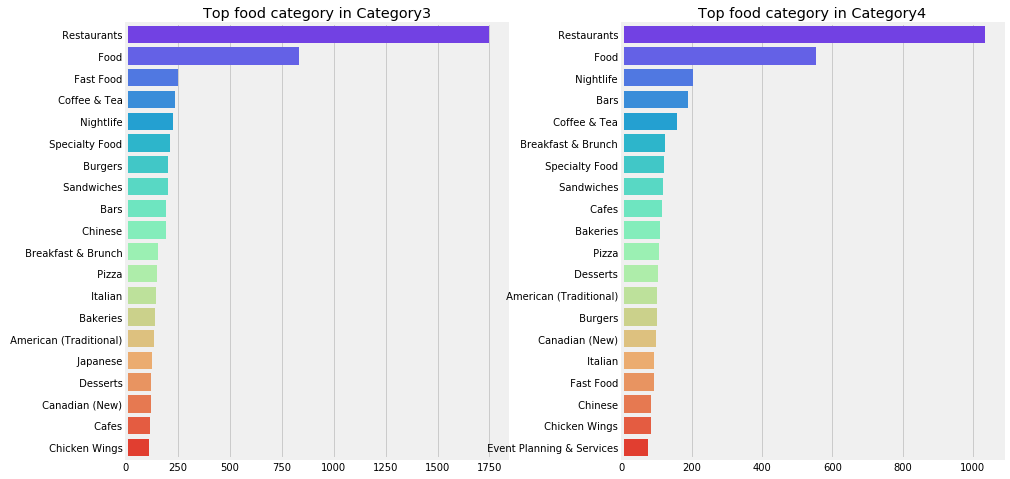

In [40]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category3'].value_counts()[:20].to_frame()

sns.barplot(cnt['category3'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category3')

cnt = foodon['category4'].value_counts()[:20].to_frame()

sns.barplot(cnt['category4'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category4')
plt.subplots_adjust(wspace=0.3)
gc.collect()

10278

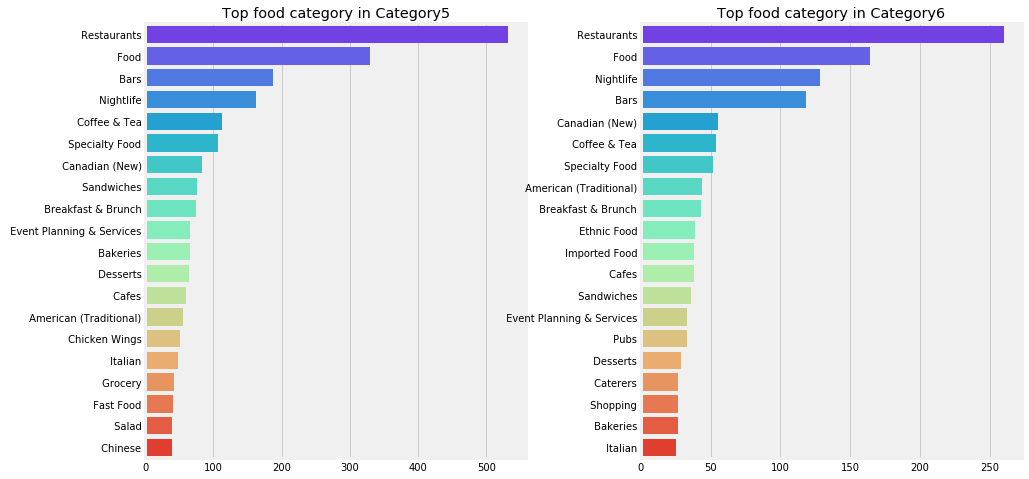

In [41]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category5'].value_counts()[:20].to_frame()

sns.barplot(cnt['category5'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category5')

cnt = foodon['category6'].value_counts()[:20].to_frame()

sns.barplot(cnt['category6'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category6')
plt.subplots_adjust(wspace=0.3)
gc.collect()

10140

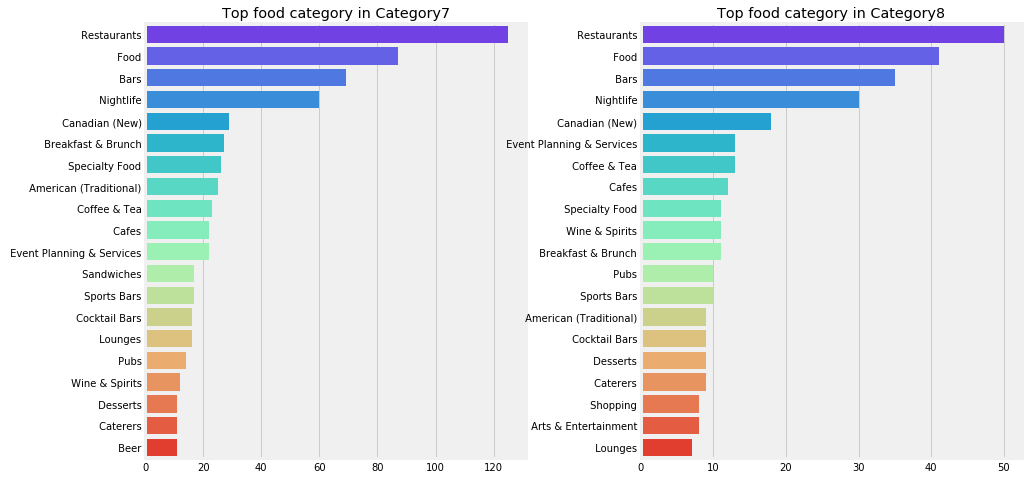

In [42]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category7'].value_counts()[:20].to_frame()

sns.barplot(cnt['category7'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category7')

cnt = foodon['category8'].value_counts()[:20].to_frame()

sns.barplot(cnt['category8'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category8')
plt.subplots_adjust(wspace=0.3)
gc.collect()

10220

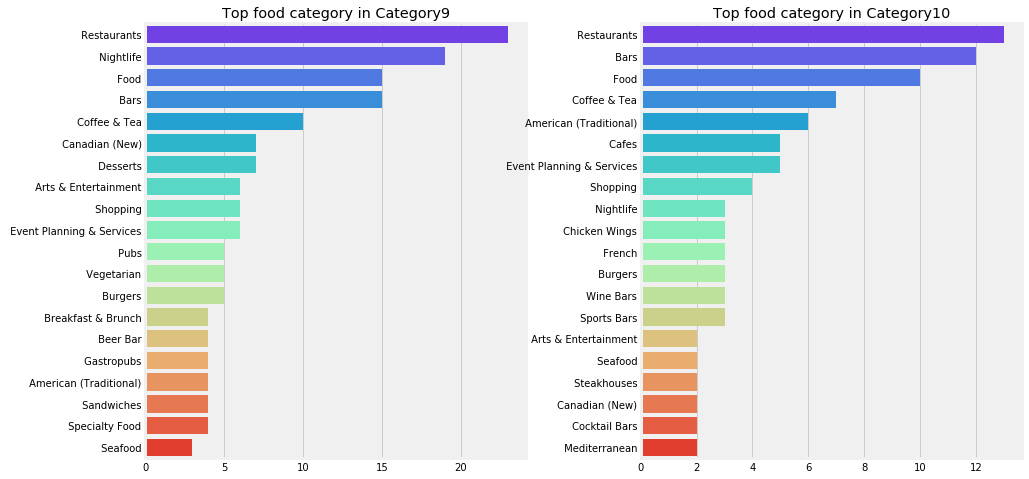

In [43]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category9'].value_counts()[:20].to_frame()

sns.barplot(cnt['category9'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category9')

cnt = foodon['category10'].value_counts()[:20].to_frame()

sns.barplot(cnt['category10'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category10')
plt.subplots_adjust(wspace=0.3)
gc.collect()

### we are displaying the city names with their total review count and average stars

In [48]:
city_foodon_reviews = foodon[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_foodon_reviews.head(50)

,review_count,stars
city,,
Toronto,313509,3.486271
Mississauga,34616,3.388240
Markham,33298,3.335645
Richmond Hill,15858,3.307500
Scarborough,12385,3.327253
North York,12085,3.219858
Vaughan,10410,3.386986
Brampton,7989,3.343385
Etobicoke,7835,3.291925


### Displaying the top 20 cities with highest no of review count

Text(0.5,1,'Top 20 cities by reviews')

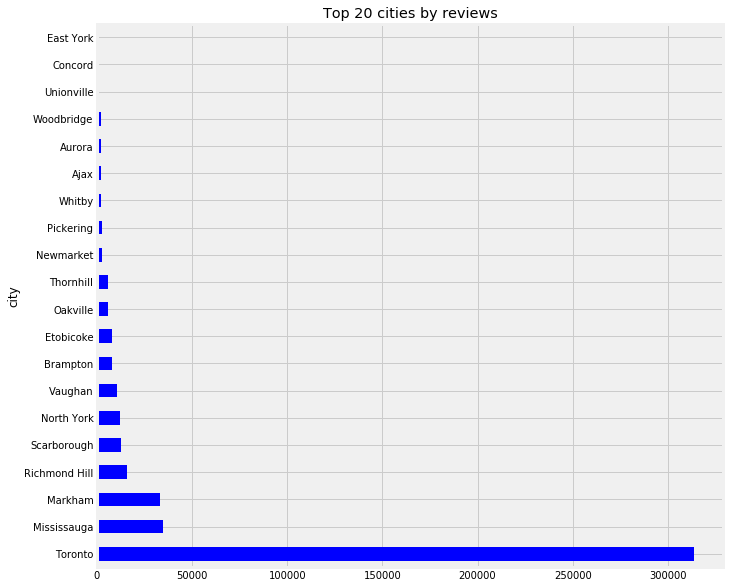

In [49]:
city_foodon_reviews['review_count'][0:20].plot(kind='barh', stacked=False, figsize=[10,10],colormap='winter')
plt.title('Top 20 cities by reviews')

#### reading the review dataset and cleaning

In [ ]:
yelp_review = pd.read_json("./yelp/yelp_academic_dataset_review.json", lines = True)
yelp_review["date"] = pd.to_datetime(yelp_review["date"], format='%Y-%m-%d')
yelp_review['year'] = yelp_review.date.dt.year

In [50]:
yelp_review.to_csv('review.csv')
yelp_review

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,2011
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,2012
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,2014
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,2011
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,2014
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g,2011
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g,2011
7,zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1,kUZWBVZvhWuC8TWUg5AYyA,5,AMAZING!!!\n\n I was referred here by a friend...,0,msQe1u7Z_XuqjGoqhB0J5g,2012
8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0,wcqt0III88LEcm19IxFFyA,4,Ribs = amazing\n2 hour wait time= not so amazi...,0,msQe1u7Z_XuqjGoqhB0J5g,2011
9,atVh8viqTj-sqDJ35tAYVg,1,2012-11-09,2,LWUtqzNthMM3vpWZIFBlPw,2,"Food is pretty good, not gonna lie. BUT you ha...",1,msQe1u7Z_XuqjGoqhB0J5g,2012


#### drop the unnamed: 0 column from the review and tip dataset

In [51]:
review = pd.read_csv('review.csv')
review.drop('Unnamed: 0', axis=1, inplace=True)
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2011.0
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2012.0
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g,2014.0
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g,2011.0
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2014.0
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0.0,pfavA0hr3nyqO61oupj-lA,1.0,This place sucks. The customer service is horr...,2.0,msQe1u7Z_XuqjGoqhB0J5g,2011.0
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0.0,brokEno2n7s4vrwmmUdr9w,5.0,"If you like Thai food, you have to try the ori...",1.0,msQe1u7Z_XuqjGoqhB0J5g,2011.0
7,zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1.0,kUZWBVZvhWuC8TWUg5AYyA,5.0,AMAZING!!!\n\n I was referred here by a friend...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2012.0
8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0.0,wcqt0III88LEcm19IxFFyA,4.0,Ribs = amazing\n2 hour wait time= not so amazi...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2011.0
9,atVh8viqTj-sqDJ35tAYVg,1,2012-11-09,2.0,LWUtqzNthMM3vpWZIFBlPw,2.0,"Food is pretty good, not gonna lie. BUT you ha...",1.0,msQe1u7Z_XuqjGoqhB0J5g,2012.0


In [234]:
foodon.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'neighborhood', 'review_count', 'stars', 'state', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', 'category9', 'category10'],
      dtype='object')

In [240]:
foodon['BusinessAcceptsCreditCards'] = foodon.BusinessAcceptsCreditCards.astype(str).str.lower()
foodon['address'] = foodon.address.astype(str).str.lower()
foodon['name'] = foodon.name.astype(str).str.lower()
foodon['BusinessAcceptsCreditCards'] = foodon.BusinessAcceptsCreditCards.astype(str).str.lower()
foodon['neighborhood'] = foodon.neighborhood.astype(str).str.lower()
foodon['city'] = foodon.city.astype(str).str.lower()
foodon['state'] = foodon.state.astype(str).str.lower()
foodon['category1'] = foodon.category1.astype(str).str.lower()
foodon['category2'] = foodon.category2.astype(str).str.lower()
foodon['category3'] = foodon.category3.astype(str).str.lower()
foodon['category4'] = foodon.category4.astype(str).str.lower()
foodon['category5'] = foodon.category5.astype(str).str.lower()
foodon['category6'] = foodon.category6.astype(str).str.lower()
foodon['category7'] = foodon.category7.astype(str).str.lower()
foodon['category8'] = foodon.category8.astype(str).str.lower()
foodon['category9'] = foodon.category9.astype(str).str.lower()
foodon['category10'] = foodon.category10.astype(str).str.lower()


In [2]:
foodon_reviews = pd.merge(foodon, review, how='inner', on='business_id')
foodon_reviews

In [11]:
foodon_reviews.to_csv("foodonreviews.csv")